# Getting Started with *pyFTracks* v 1.0

**Romain Beucher, Roderick Brown, Louis Moresi and Fabian Kohlmann**

The Australian National University
The University of Glasgow
Lithodat

*pyFTracks* is a Python package that can be used to predict Fission Track ages and Track lengths distributions for some given thermal-histories and kinetic parameters.

*pyFTracks* is an open-source project licensed under the MiT license. See LICENSE.md for details.

The functionalities provided are similar to Richard Ketcham HeFTy sofware. 
The main advantage comes from its Python interface which allows users to easily integrate *pyFTracks* with other Python libraries and existing scientific applications.
*pyFTracks* is available on all major operating systems.

For now, *pyFTracks* only provide forward modelling functionalities. Integration with inverse problem schemes is planned for version 2.0.


# Installation

*pyFTracks* is availabe on pypi. The code should work on all major operating systems (Linux, MaxOSx and Windows)

`pip install pyFTracks`

# Importing *pyFTracks*

The recommended way to import pyFTracks is to run:

In [1]:
import pyFTracks as FT

# Input

## Specifying a Thermal history

In [2]:
thermal_history = FT.ThermalHistory(name="My Thermal History",
                  time=[0., 43., 44., 100.],
                  temperature=[283., 283., 403., 403.])

In [3]:
import matplotlib.pyplot as plt

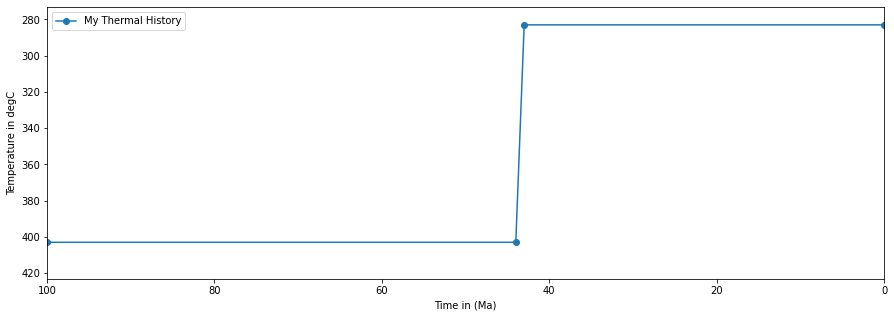

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(thermal_history.input_time, thermal_history.input_temperature, label=thermal_history.name, marker="o")
plt.xlim(100., 0.)
plt.ylim(150. + 273.15, 0.+273.15)
plt.ylabel("Temperature in degC")
plt.xlabel("Time in (Ma)")
plt.legend()

## Predefined thermal histories

We provide predefined thermal histories for convenience.

In [5]:
from pyFTracks.thermal_history import WOLF1, WOLF2, WOLF3, WOLF4, WOLF5

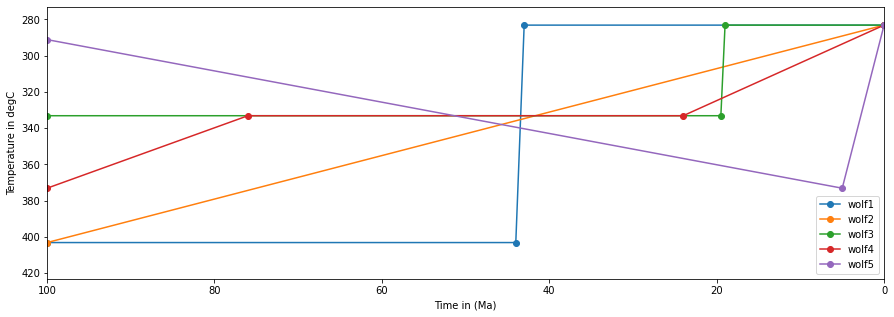

In [6]:
thermal_histories = [WOLF1, WOLF2, WOLF3, WOLF4, WOLF5]

plt.figure(figsize=(15, 5))
for thermal_history in thermal_histories:
    plt.plot(thermal_history.input_time, thermal_history.input_temperature, label=thermal_history.name, marker="o")
plt.xlim(100., 0.)
plt.ylim(150. + 273.15, 0.+273.15)
plt.ylabel("Temperature in degC")
plt.xlabel("Time in (Ma)")
plt.legend()    

## Annealing Models

In [7]:
annealing_model = FT.AnnealingModel(model="Ketcham 1999")
annealing_model.history = WOLF1

In [8]:
annealing_model.calculate_age()

(44.000264884391086, 44.909918114996046, 0.5130283405118911)

In [9]:
annealing_model = FT.AnnealingModel(model="Ketcham 2007")
annealing_model.history = WOLF1

In [13]:
annealing_model.calculate_age()

(44.000264884391086, 44.75872228388043, 0.5088479129771732)

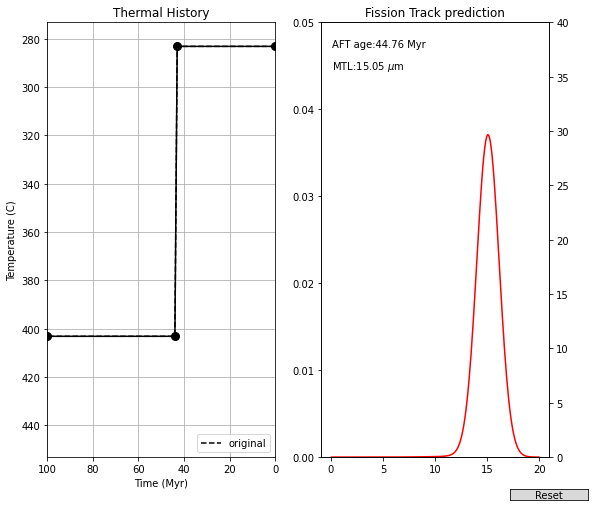

In [11]:
FT.Viewer(history=WOLF1, annealing_model=annealing_model)

# Simple Fission-Track data Predictions

In [2]:
Ns = [31, 19, 56, 67, 88, 6, 18, 40, 36, 54, 35, 52, 51, 47, 27, 36, 64, 68, 61, 30]
Ni = [41, 22, 63, 71, 90, 7, 14, 41, 49, 79, 52, 76, 74, 66, 39, 44, 86, 90, 91, 41]

zeta = 350.
zeta_err = 10. / 350.
rhod = 1.304
rhod_err = 0.
Nd = 2936

In [3]:
FT.central_age(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Central': 175.5672998835018,
 'se': 8.510137020148957,
 'sigma': 5.1978616298287776e-05}

In [4]:
FT.pooled_age(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Pooled Age': 175.56729987574315, 'se': 9.878490119317705}

In [5]:
FT.single_grain_ages(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Age(s)': array([170.27277726, 194.12922188, 199.71847392, 211.82501094,
        219.35417906, 192.69120201, 286.91906312, 218.87597033,
        165.51402406, 154.12751783, 151.7948727 , 154.27595627,
        155.38512454, 160.49155828, 156.07978109, 184.05633985,
        167.62488355, 170.15231471, 151.18251036, 164.84973261]),
 'se(s)': array([ 40.93820562,  61.15626671,  37.30358567,  36.79102639,
         33.72043367, 107.40365187, 102.70782874,  49.20922289,
         36.7660512 ,  27.71454167,  33.5872093 ,  28.25634367,
         28.7686159 ,  31.11427488,  39.43447289,  41.83466447,
         28.25353735,  27.94537164,  25.54017193,  40.0012906 ])}

In [6]:
FT.chi2_test(Ns, Ni)

0.9292129985459694

# Included datasets

*pyFTracks* comes with some sample datasets that can be used for testing and designing general code.

In [7]:
from pyFTracks.ressources import Gleadow
from pyFTracks.ressources import Miller

In [8]:
Gleadow

,Ns,Ni,A,Ns/Ni,RhoS,RhoI,Ages,Ages Errors
0,0,11,24,0.000000,0.000000,0.587607,0.000000,0.000000
1,2,11,44,0.181818,0.058275,0.320513,43.278037,33.276402
2,18,28,32,0.642857,0.721154,1.121795,151.733746,45.914216
3,2,4,40,0.500000,0.064103,0.128205,118.322435,102.490403
4,10,78,90,0.128205,0.142450,1.111111,30.546742,10.273691
5,3,22,30,0.136364,0.128205,0.940171,32.485736,20.001379
6,4,8,40,0.500000,0.128205,0.256410,118.322435,72.485917
7,20,57,50,0.350877,0.512821,1.461538,83.259997,21.685852
8,52,129,20,0.403101,3.333333,8.269231,95.560756,15.782855
9,2,7,45,0.285714,0.056980,0.199430,67.878517,54.436387


In [9]:
FT.central_age(Gleadow.Ns,
               Gleadow.Ni,
               Gleadow.zeta,
               Gleadow.zeta_error,
               Gleadow.rhod,
               Gleadow.nd)

{'Central': 94.09935886162337,
 'se': 10.157833459811043,
 'sigma': 0.446112700671759}

In [10]:
Miller

,Ns,Ni,A,Ns/Ni,RhoS,RhoI,Ages,Ages Errors
0,31,41,40,0.756098,0.861111,1.138889,170.272777,40.938206
1,19,22,20,0.863636,1.055556,1.222222,194.129222,61.156267
2,56,63,60,0.888889,1.037037,1.166667,199.718474,37.303586
3,67,71,80,0.943662,0.930556,0.986111,211.825011,36.791026
4,88,90,90,0.977778,1.086420,1.111111,219.354179,33.720434
5,6,7,15,0.857143,0.444444,0.518519,192.691202,107.403652
6,18,14,20,1.285714,1.000000,0.777778,286.919063,102.707829
7,40,41,40,0.975610,1.111111,1.138889,218.875970,49.209223
8,36,49,40,0.734694,1.000000,1.361111,165.514024,36.766051
9,54,79,60,0.683544,1.000000,1.462963,154.127518,27.714542


In [11]:
FT.central_age(Miller.Ns,
               Miller.Ni,
               Miller.zeta,
               Miller.zeta_error,
               Miller.rhod,
               Miller.nd)

{'Central': 175.5672998835018,
 'se': 8.510137020148957,
 'sigma': 5.1978616298287776e-05}

In [12]:
Miller.calculate_central_age()

{'Central': 175.5672998835018,
 'se': 8.510137020148957,
 'sigma': 5.1978616298287776e-05}

In [13]:
Miller.calculate_pooled_age()

{'Pooled Age': 175.56729987574315, 'se': 9.878490119317705}

In [14]:
Miller.calculate_ages()

{'Ages': [170.2727772640975,
  194.12922187599696,
  199.71847392127856,
  211.82501093801739,
  219.35417905655055,
  192.69120201058783,
  286.9190631239537,
  218.87597033417916,
  165.51402406094212,
  154.12751782896967,
  151.794872702224,
  154.27595627096636,
  155.3851245378071,
  160.49155827680758,
  156.07978109227116,
  184.05633985285064,
  167.62488355180588,
  170.15231471139003,
  151.18251036284565,
  164.84973261253256],
 'Ages Errors': [40.93820562355294,
  61.15626671371068,
  37.30358567232624,
  36.7910263894117,
  33.72043366931745,
  107.40365186503979,
  102.7078287392375,
  49.20922289475659,
  36.76605120432735,
  27.714541673022094,
  33.58720930380308,
  28.25634366989746,
  28.768615902243397,
  31.114274880491372,
  39.434472886917085,
  41.83466446876438,
  28.25353734688477,
  27.94537164366046,
  25.54017192729246,
  40.001290595963304]}